In [1]:
import urllib
from bs4 import BeautifulSoup
import requests
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.cluster import KMeans

In [2]:
f = open('CR00340(1).txt', 'r')

In [3]:
content = f.read()

In [ ]:
content

In [4]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['writing', 'years', 'written', 'said', 'section',\
                                              'sections', 'words'])
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 1),stop_words=my_stop_words)
features = tfidf.fit_transform(list(content.split('\n')))

In [5]:
features

<2354x326 sparse matrix of type '<class 'numpy.float64'>'
	with 4437 stored elements in Compressed Sparse Row format>

In [6]:
d = tfidf.vocabulary_

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [12]:
import numpy as np
from PIL import Image
import random
mask = np.array(Image.open("fist2.png"))

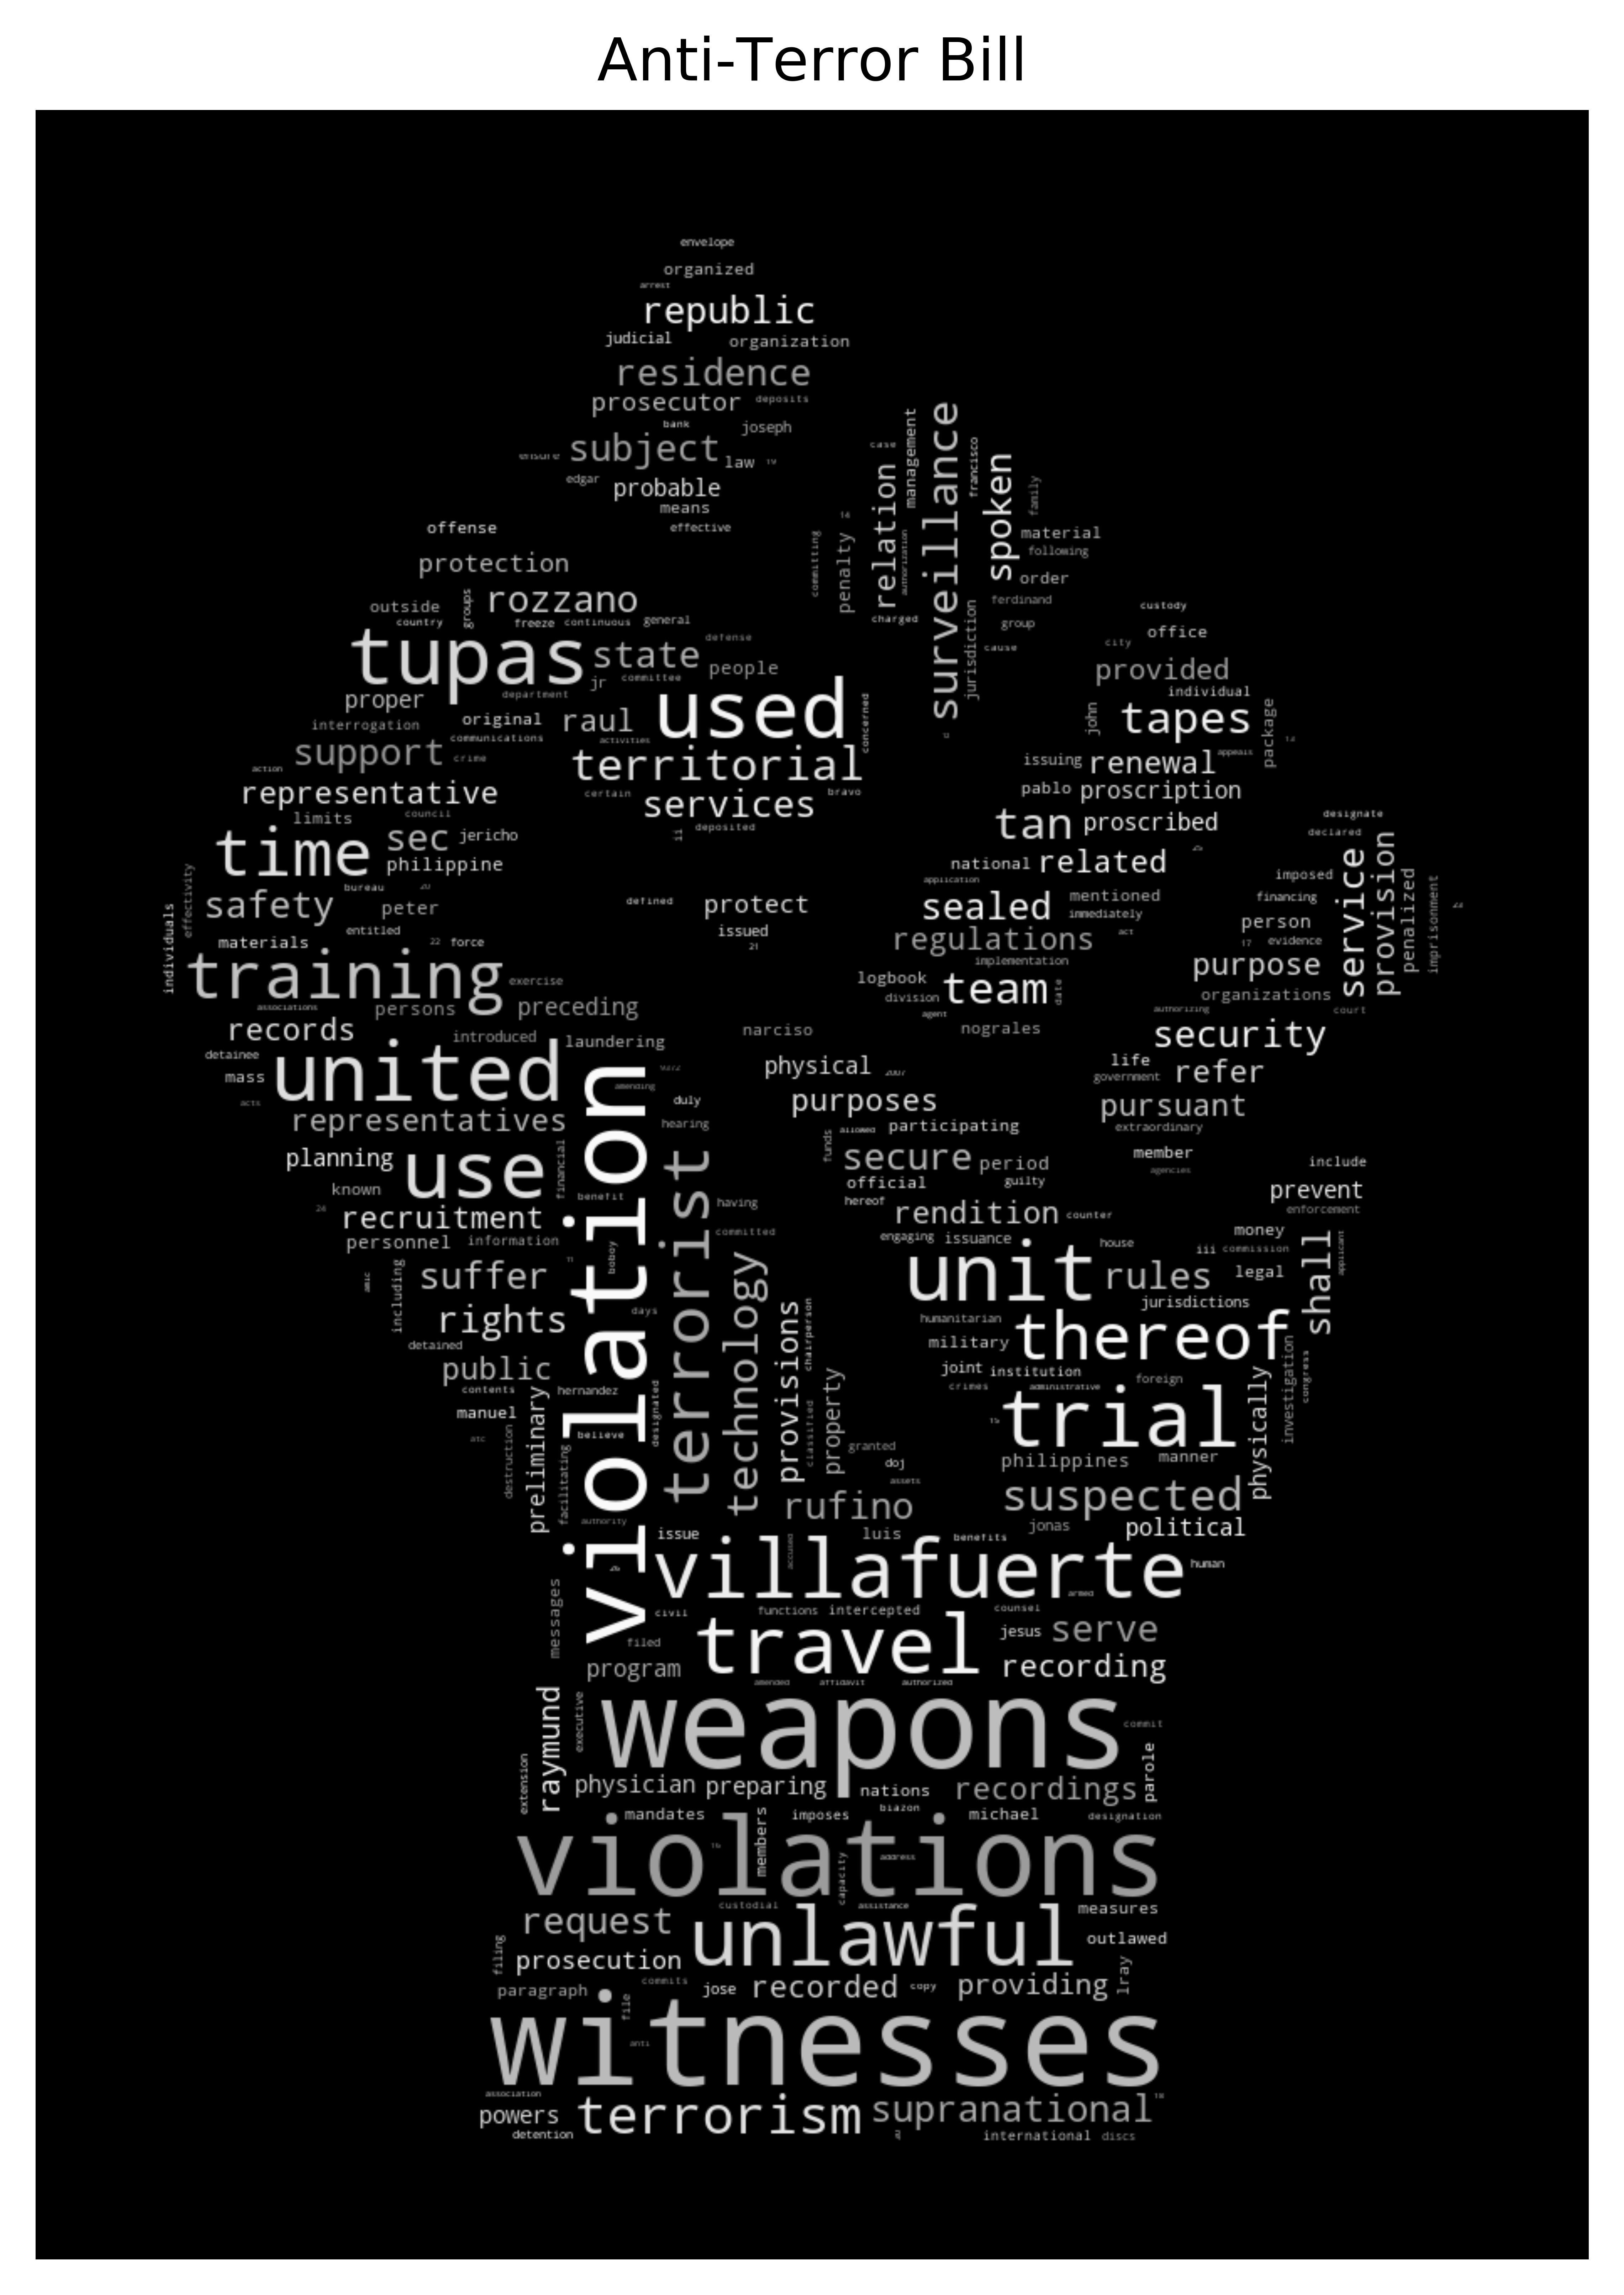

In [13]:
wordcloud = WordCloud(background_color="black",max_words=2000, margin=10, mask=mask)#,width = 1024,height = 720)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure( dpi=1000, figsize=(20, 8))
default_colors = wordcloud.to_array()
plt.title('Anti-Terror Bill')
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()